In [151]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\tasnu\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [152]:
# install joblib. This will be used to save the model. 
# Restart the kernel after installing 
!pip install joblib


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import mpld3

## Read the CSV and Perform Basic Data Cleaning

In [3]:
# Read the file
df = pd.read_csv("googleplaystore.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
# Check the raw data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Perform intense data cleaing 

In [5]:
# Get names of indexes for which column Size has value "Varies with device"
indexNames = df[ df['Size'] == 'Varies with device' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [6]:
# Get rid of the non numeric values and symbols from the rows with numbers

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '')
                                if isinstance(x, str) else x).astype(float)
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '').replace('k', '')
                                if isinstance(x, str) else x).astype(float) 
df['Installs'] = df['Installs'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 

In [7]:
# Import scikit library to evaluate the models

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split

# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''

'\nAdults only 18+ = 0\nEveryone = 1\nEveryone 10+ = 2\nMature 17+ = 3\nTeen = 4\n'

In [8]:
# Change the Column headers
df = df.rename(columns = {'Content Rating':'ContentRating','Content Rating NUM':'ContentRatingNUM','Last Updated':'LastUpdated', 'Current Ver':'CurrentVer','Android Ver':'AndroidVer'})

In [9]:
# Check the data type after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               7723 non-null   object 
 1   Category          7723 non-null   object 
 2   Rating            7723 non-null   float64
 3   Reviews           7723 non-null   float64
 4   Size              7723 non-null   float64
 5   Installs          7723 non-null   float64
 6   Type              7723 non-null   object 
 7   Price             7723 non-null   float64
 8   ContentRating     7723 non-null   object 
 9   Genres            7723 non-null   object 
 10  LastUpdated       7723 non-null   object 
 11  CurrentVer        7723 non-null   object 
 12  AndroidVer        7723 non-null   object 
 13  ContentRatingNUM  7723 non-null   int32  
dtypes: float64(5), int32(1), object(8)
memory usage: 874.9+ KB


In [10]:
#Check the final data frame 
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,ContentRatingNUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1


## Import scikit libraries

In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Multiple Liner Regression

### Divide the data into “attributes” and “labels”. 
X variable contains all the attributes/features and y variable contains labels.

In [12]:
X = df[['Reviews', 'Price', 'Size', 'Installs']].values
y = df['Rating'].values

### Check the average value of the “Rating” column.

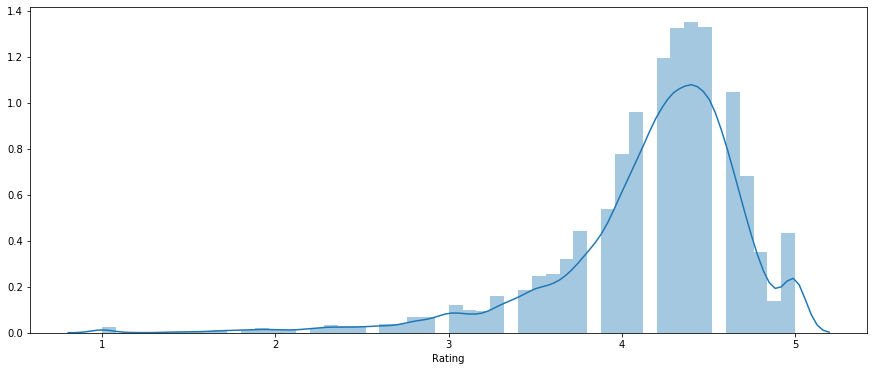

In [13]:
plt.figure(figsize=(15,6))
plt.tight_layout()
seabornInstance.distplot(df['Rating'])

## Train Test Split

In [14]:
# Split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

4.174138565731834
[ 2.14829121e-08 -8.60336349e-04 -1.27637768e-04  7.89569762e-11]


### Perform prediction on test data

In [17]:
y_pred = regressor.predict(X_test)

In [22]:
#Check the difference between actual and predicted data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.6,4.130732
1,4.4,4.173815
2,4.2,4.170951
3,3.0,4.171587
4,3.5,4.164976
...,...,...
1540,4.5,4.173128
1541,3.0,4.172952
1542,4.8,4.175176
1543,3.9,4.171265


In [24]:
print(df['Predicted'].mean())

4.1729870785865515


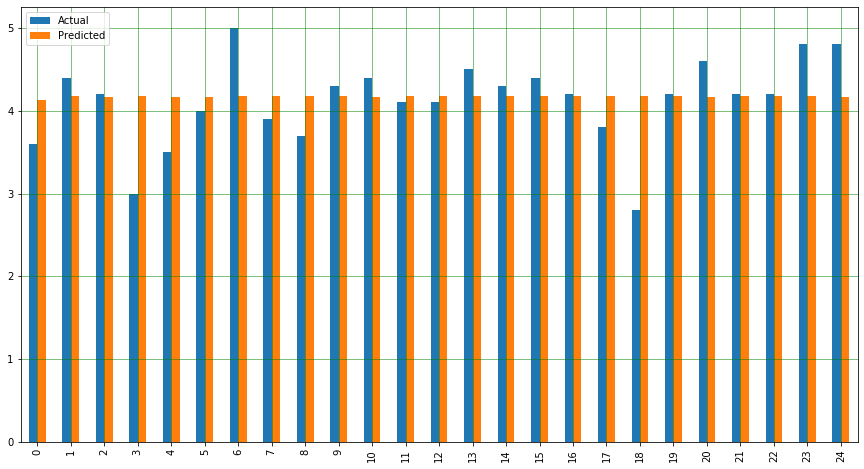

In [20]:
# Plot the comparison of Actual and Predicted value
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
# Evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3942454038528476
Mean Squared Error: 0.3244738652740335
Root Mean Squared Error: 0.5696260749597348
